In [129]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None

In [130]:
# Imporing the data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [131]:
# Creating a copy of train and test data
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

### Continuous variable

Time_of_service - > Number of Years in the organization

Age -> Age of the Employee(in Years)

Growth_Rate-> Growth rate in percentage of an employee

### Binary Variables

Gender -> M for Male and F for Female

Relationship_Status -> Single or Married

### Ordinal Variables

Education_Level -> Rating of Qualification of an employee (1-5)

Travel_Rate	-> Rating based on travel history(1-3)

Post_Level-> Level of the post in an organization (1-5)

Pay_Scale-> Rate in between 1 to 10

Work_Life_balance-> Rating for work-life balance given by an employee.

### Nominal Variable

HomeTown -> Name of the employee's HomeTown

Units -> Department under which the employee work

Decision_skill_possess-> Decision skill that an employee possesses

Compensation_and_Benefits -> Category from Type_0 to Type_4

Employee_ID -> Unique ID of each employee

### Others

VAR1 - VAR7	 -> Anonymized variables

### Target variable

Attrition_rate -> Attrition rate of each employee

In [132]:
print(train_data.shape)
print(test_data.shape)

(7000, 24)
(3000, 23)


In training dataset we have 7000 records and 24 column out of which Attrition_rate is our target feature and rest are independent features. In test data we have 3000 records with 23 independent features.

In [133]:
# Checking null values in the training dataset
train_data.isnull().sum().sort_values(ascending =False)

VAR4                         656
VAR2                         577
Age                          412
Time_of_service              144
Work_Life_balance             11
Pay_Scale                      9
Attrition_rate                 0
Time_since_promotion           0
Gender                         0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Travel_Rate                    0
growth_rate                    0
VAR7                           0
Post_Level                     0
Compensation_and_Benefits      0
VAR1                           0
VAR3                           0
VAR5                           0
VAR6                           0
Employee_ID                    0
dtype: int64

Age has 412 null values , Time_of_service has 144 null values , Work_life_balance has 11 null values , Pay_scale has 9 null values , VAR2 ahs 577 null values and VAR4 has 656 null values

In [134]:
# Checking null values in the test dataset
test_data.isnull().sum().sort_values(ascending =False)

VAR4                         298
VAR2                         217
Age                          161
Time_of_service               52
Work_Life_balance              5
Pay_Scale                      3
VAR7                           0
Gender                         0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Travel_Rate                    0
Time_since_promotion           0
growth_rate                    0
VAR6                           0
Post_Level                     0
Compensation_and_Benefits      0
VAR1                           0
VAR3                           0
VAR5                           0
Employee_ID                    0
dtype: int64

Age has 161 null values , Time_of_service has 52 null values , Work_life_balance has 5 null values , Pay_scale has 3 null values , VAR2 ahs 217 null values and VAR4 has 298 null values

In [135]:
# Getting correlation among continuous variables
train_data[["Age","Time_of_service","growth_rate","Attrition_rate"]].corr()

,Age,Time_of_service,growth_rate,Attrition_rate
Age,1.000000,0.918853,0.001270,-0.015498
Time_of_service,0.918853,1.000000,-0.003486,-0.016447
growth_rate,0.001270,-0.003486,1.000000,0.014247
Attrition_rate,-0.015498,-0.016447,0.014247,1.000000


There is a high level of correlation between Age and Time_of_Service . So we can fill null values in Age according to the Time_of_Service and we can also fill the null values in Time_of_service according to the age.

In [136]:
# Fill NA in Time_of_Service Column according to the age

# Train Data
dict_train = {}
unique_list = sorted(train_data_copy["Age"].unique().astype("int64"))
for i in np.arange(len(unique_list)-1):
    dict_train[unique_list[i+1]] = train_data_copy[train_data_copy["Age"] == unique_list[i+1]]["Time_of_service"].mode()[0].astype("int64")
train_data["Time_of_service"] = train_data["Time_of_service"].fillna(value=train_data["Age"].apply(lambda x: dict_train.get(x)))

#Test Data
dict_test = {}
unique_list = sorted(test_data_copy["Age"].unique().astype("int64"))
for i in np.arange(len(unique_list)-1):
    dict_test[unique_list[i+1]] = test_data_copy[test_data_copy["Age"] == unique_list[i+1]]["Time_of_service"].mode()[0].astype("int64") 
test_data["Time_of_service"] = test_data["Time_of_service"].fillna(value=test_data["Age"].apply(lambda x: dict_test.get(x)))


In [137]:
# Fill NA in Age Column accoring to the Time_of_Service

# Train Data
dict_train = {}
unique_list = sorted(train_data_copy["Time_of_service"].unique().astype("int64"))

for i in np.arange(len(unique_list)-1):
    dict_train[unique_list[i+1]] = train_data_copy[train_data_copy["Time_of_service"] == unique_list[i+1]]["Age"].mode()[0].astype("int64")
train_data["Age"] = train_data["Age"].fillna(value=train_data["Time_of_service"].apply(lambda x: dict_train.get(x)))

#Test Data
dict_test = {}
unique_list = sorted(test_data_copy["Time_of_service"].unique().astype("int64"))
for i in np.arange(len(unique_list)-1):
    dict_test[unique_list[i+1]] = test_data_copy[test_data_copy["Time_of_service"] == unique_list[i+1]]["Age"].mode()[0].astype("int64") 
test_data["Age"] = test_data["Age"].fillna(value=test_data["Time_of_service"].apply(lambda x: dict_test.get(x)))


In [138]:
# Checking null values in the training dataset
train_data.isnull().sum().sort_values(ascending =False)

VAR4                         656
VAR2                         577
Work_Life_balance             11
Pay_Scale                      9
Age                            7
Time_of_service                7
Attrition_rate                 0
Time_since_promotion           0
Gender                         0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Travel_Rate                    0
growth_rate                    0
VAR7                           0
Post_Level                     0
Compensation_and_Benefits      0
VAR1                           0
VAR3                           0
VAR5                           0
VAR6                           0
Employee_ID                    0
dtype: int64

There are 7 records in the data which have null in both Age and Time_of_service variable so I am going to replce these records with their median value

In [139]:
# Replacing Null values with Median values
#Train data

train_data["Age"].fillna(train_data["Age"].median(), axis=0, inplace=True)
train_data["Time_of_service"].fillna(train_data["Time_of_service"].median(), axis=0, inplace=True)
train_data["Work_Life_balance"].fillna(train_data["Work_Life_balance"].median(), axis=0, inplace=True)
train_data["Pay_Scale"].fillna(train_data["Pay_Scale"].median(), axis=0, inplace=True)
train_data["VAR2"].fillna(train_data["VAR2"].median(), axis=0, inplace=True)
train_data["VAR4"].fillna(train_data["VAR4"].median(), axis=0, inplace=True)

# Test data
test_data["Age"].fillna(test_data["Age"].median(), axis=0, inplace=True)
test_data["Time_of_service"].fillna(test_data["Time_of_service"].median(), axis=0, inplace=True)
test_data["Work_Life_balance"].fillna(test_data["Work_Life_balance"].median(), axis=0, inplace=True)
test_data["Pay_Scale"].fillna(test_data["Pay_Scale"].median(), axis=0, inplace=True)
test_data["VAR2"].fillna(test_data["VAR2"].median(), axis=0, inplace=True)
test_data["VAR4"].fillna(test_data["VAR4"].median(), axis=0, inplace=True)

In [140]:
train_data.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [141]:
# Convert Floating value into integer
train_data["Age"] = train_data["Age"].astype("int64")
train_data["Time_of_service"] = train_data["Time_of_service"].astype("int64")
train_data["Pay_Scale"] = train_data["Pay_Scale"].astype("int64")
train_data["Work_Life_balance"] = train_data["Work_Life_balance"].astype("int64")

test_data["Age"] = test_data["Age"].astype("int64")
test_data["Time_of_service"] = test_data["Time_of_service"].astype("int64")
test_data["Pay_Scale"] = test_data["Pay_Scale"].astype("int64")
test_data["Work_Life_balance"] = test_data["Work_Life_balance"].astype("int64")

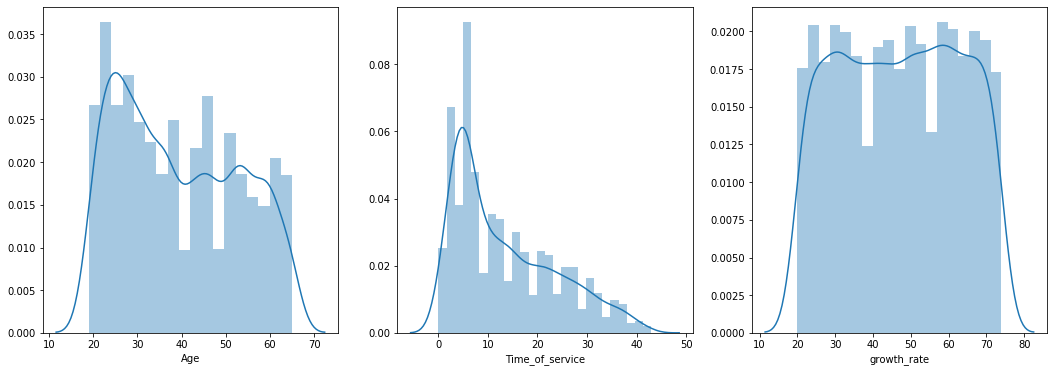

In [142]:
fig , ax = plt.subplots(nrows=1, ncols=3,squeeze=False, figsize =(18,6))
sns.distplot(train_data["Age"], ax=ax[0][0])
sns.distplot(train_data["Time_of_service"], ax=ax[0][1])
sns.distplot(train_data["growth_rate"], ax=ax[0][2])
plt.show()

None of the above column is normally distributed.Age and Time_of_service are mostly on right skewed

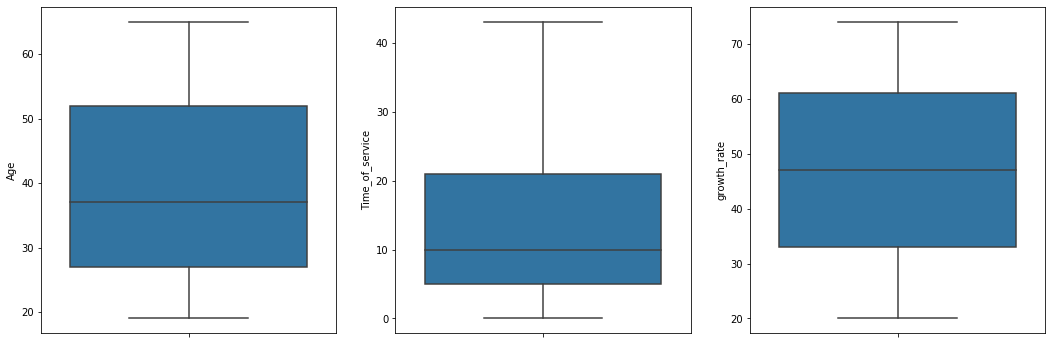

In [143]:
fig , ax = plt.subplots(nrows=1, ncols=3,squeeze=False, figsize =(18,6))
sns.boxplot(y=train_data["Age"], ax=ax[0][0])
sns.boxplot(y=train_data["Time_of_service"], ax=ax[0][1])
sns.boxplot(y=train_data["growth_rate"], ax=ax[0][2])
plt.show()

There is no Outliers in the above boxplots

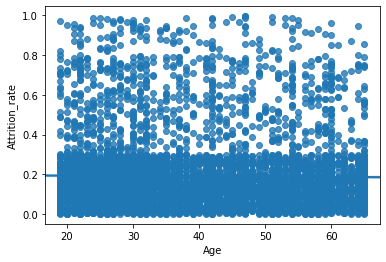

In [144]:
from scipy.stats import pearsonr
sns.regplot(x=train_data["Age"], y=train_data["Attrition_rate"])
plt.show()

There is no linear relationship between Age and Attrition Rate

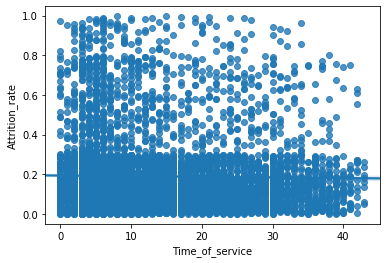

In [145]:
sns.regplot(x=train_data["Time_of_service"], y=train_data["Attrition_rate"])
plt.show()

There is no linear relationship between Time_of_service and Attrition Rate

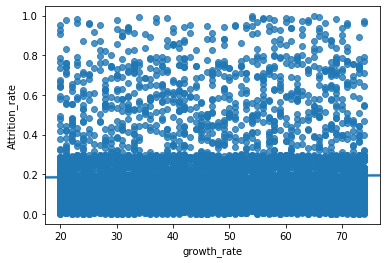

In [146]:
sns.regplot(x=train_data["growth_rate"], y=train_data["Attrition_rate"])
plt.show()

There is no linear relationship between Growth Rate and Attrition Rate

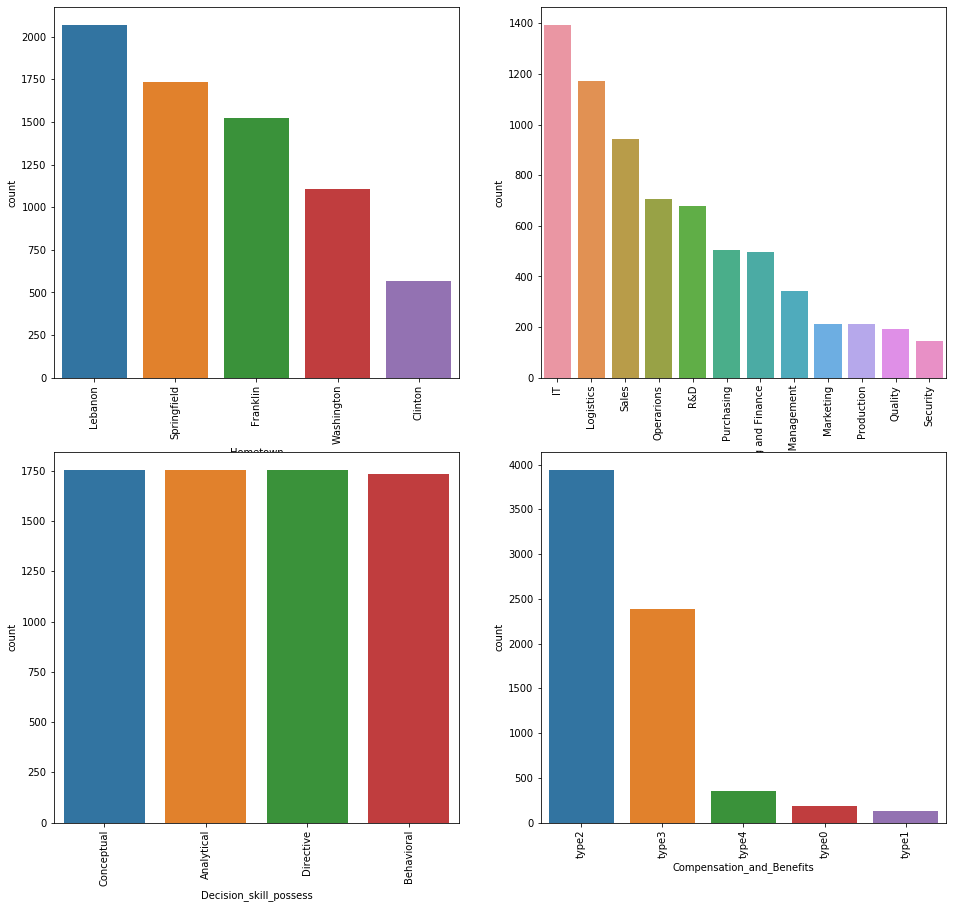

In [147]:
k=0
cols = ["Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"]
fig , ax = plt.subplots(2,2,figsize=(16,15))
for i in np.arange(2):
    for j in np.arange(2):
        chart = sns.countplot(x = train_data[cols[k]], ax=ax[i][j], order=train_data[cols[k]].value_counts().index)
        chart.set_xticklabels(rotation=90,labels = chart.get_xticklabels())
        k += 1
plt.show()        

Findings from the above charts->

Most of the employees live in Lebanon followed by Springfield and least no. of customers live in Clinton town.

Most of the employees work in IT and Logistic unit and least no. of employees works in security unit

No. of employees who possess Conceptual , Analytical , Directive and Behavioral skills are almost equal

Most of the employees got Type2 and Type3 benefits

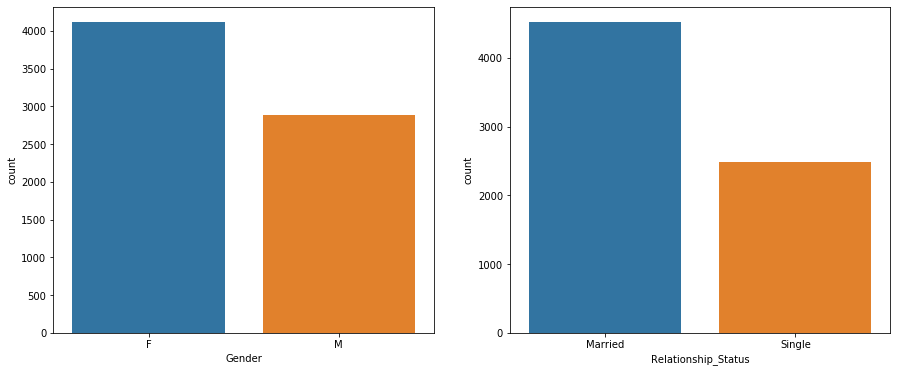

In [148]:
fig , ax = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.countplot(x = train_data["Gender"], ax=ax[0][0])
sns.countplot(x = train_data["Relationship_Status"], ax=ax[0][1])
plt.show()

There are more number of Female employee in the organisation than male employee. Also Number of Married employees is more than the no. of Single employees.

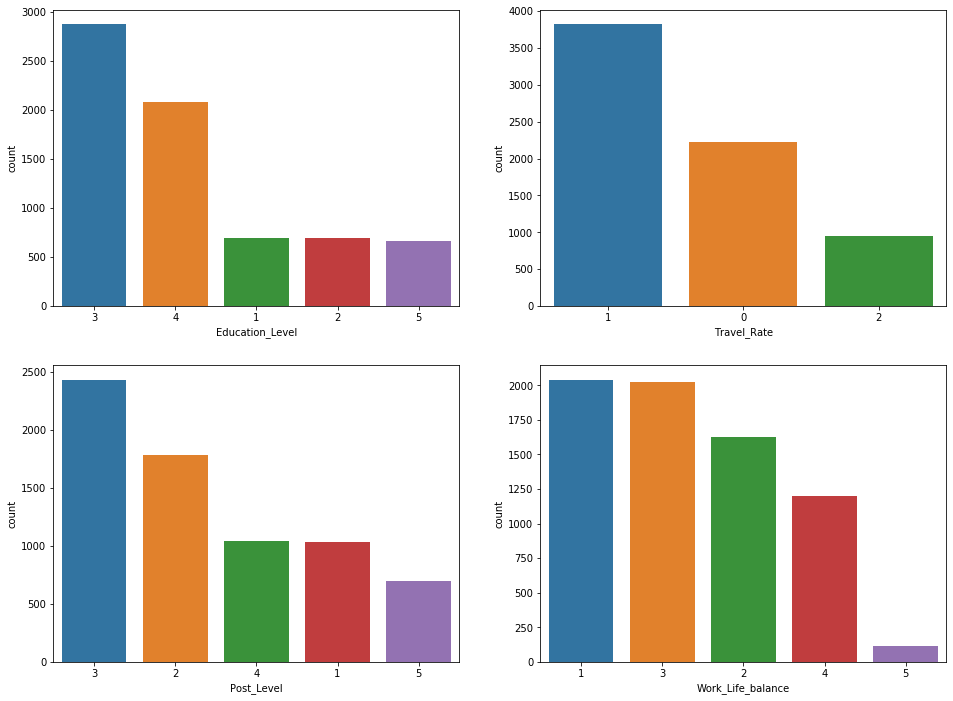

In [149]:
k=0
cols = ["Education_Level","Travel_Rate","Post_Level","Work_Life_balance"]
fig , ax = plt.subplots(2,2,figsize=(16,12))
for i in np.arange(2):
    for j in np.arange(2):
        chart = sns.countplot(x = train_data[cols[k]], ax=ax[i][j], order=train_data[cols[k]].value_counts().index)
        k += 1
plt.show()        

Most of the employees have education level 3 or 4

Most of the employess are working on post level 2 or 3

Rating given by most of the employees on work life balance is either 1, 2 or 3

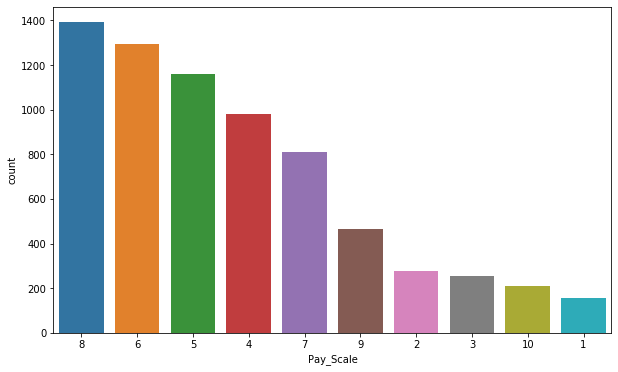

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(x = train_data["Pay_Scale"], order=train_data["Pay_Scale"].value_counts().index)
plt.show()

The above chart shows the most of the employees in organisation are working on 8th Pay Scale and least number of employees are working on 1st pay scale

In [151]:
# Train data
train_data["Gender"].replace({"F":0,"M":1}, inplace=True)
train_data["Relationship_Status"].replace({"Single":0,"Married":1}, inplace=True)

# Test Data
test_data["Gender"].replace({"F":0,"M":1}, inplace=True)
test_data["Relationship_Status"].replace({"Single":0,"Married":1}, inplace=True)

In [152]:
train_data.corr()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Gender,1.000000,-0.006678,-0.007127,-0.008817,-0.002854,-0.020346,-0.011666,0.006566,0.003734,-0.004958,-0.003546,-0.005024,0.002907,-0.000272,-0.002937,0.015351,0.009894,0.002916,0.028544
Age,-0.006678,1.000000,-0.009658,0.002643,0.919627,0.147321,-0.001883,0.011040,-0.002763,0.014425,0.005670,0.008333,0.003600,0.006966,-0.000074,-0.005145,-0.000272,0.003218,-0.012113
Education_Level,-0.007127,-0.009658,1.000000,0.000529,-0.013669,-0.002077,0.002991,-0.017690,0.009986,0.006830,-0.015098,-0.002185,-0.010076,-0.009689,0.004731,0.005444,0.009195,0.012909,-0.008143
Relationship_Status,-0.008817,0.002643,0.000529,1.000000,-0.002818,0.005071,-0.008672,-0.004016,-0.015647,-0.008336,0.005449,-0.008051,0.016682,-0.011275,-0.021183,0.012621,0.001844,-0.020221,-0.009107
Time_of_service,-0.002854,0.919627,-0.013669,-0.002818,1.000000,0.133757,-0.003707,0.006982,-0.001594,0.018475,-0.000982,0.006411,0.002990,0.005630,-0.003303,0.000059,0.006773,0.005882,-0.017650
Time_since_promotion,-0.020346,0.147321,-0.002077,0.005071,0.133757,1.000000,0.014147,-0.012061,-0.008851,-0.008892,-0.007459,-0.002873,0.004133,-0.002783,-0.003029,0.000563,0.017264,0.005173,0.013880
growth_rate,-0.011666,-0.001883,0.002991,-0.008672,-0.003707,0.014147,1.000000,0.008460,-0.006887,-0.004142,-0.018092,0.001351,0.010594,0.010991,0.020005,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.006566,0.011040,-0.017690,-0.004016,0.006982,-0.012061,0.008460,1.000000,0.021299,-0.011678,0.004281,0.023898,0.007772,-0.009019,-0.005177,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.003734,-0.002763,0.009986,-0.015647,-0.001594,-0.008851,-0.006887,0.021299,1.000000,0.022375,-0.014595,-0.008458,-0.006379,0.010387,-0.012055,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,-0.004958,0.014425,0.006830,-0.008336,0.018475,-0.008892,-0.004142,-0.011678,0.022375,1.000000,-0.022845,0.011349,0.006299,0.003378,-0.010818,0.018071,-0.012316,0.002379,-0.015221


Correlation value of Target column is very low with each feature column.

Correlation Value between Age and Time of Service is 0.92 . Correlation value between Time_since_promotion and Time_of_service is 0.13 . Apart from these ,all the independent variables have very low correlation value themselves

In [153]:
# Applying Label Encoder and OneHot Encoding
# Train Data
train_data= pd.get_dummies(train_data, columns=["Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"])
# Test Data
test_data= pd.get_dummies(test_data, columns=["Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"])

In [154]:
# Calculating Correlation From VAR1 to VAR7 with Target Column
from scipy.stats import pearsonr
cols =["VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7"]
for i in np.arange(7):
    r , p = pearsonr(train_data[cols[i]],train_data["Attrition_rate"])
    print("r value is {} for column {} ".format(r,cols[i]))

r value is -0.008073227303011007 for column VAR1 
r value is -0.022750996055581053 for column VAR2 
r value is 0.0012452364366666861 for column VAR3 
r value is -0.013363945231998842 for column VAR4 
r value is -0.004769530979202389 for column VAR5 
r value is -0.0031299833957783895 for column VAR6 
r value is -0.0152990989835192 for column VAR7 


Here r value is very low of all the var from VAR1 to VAR7 with Target column

In [155]:
# Multiplying all the variable from VAR1 to VAR7 to create a single variable named "ALL_VAR"
train_data["ALL_VAR"] = train_data["VAR1"]*train_data["VAR2"]*train_data["VAR3"]*train_data["VAR4"]*train_data["VAR5"]*train_data["VAR6"]*train_data["VAR7"]
test_data["ALL_VAR"] = test_data["VAR1"]*test_data["VAR2"]*test_data["VAR3"]*test_data["VAR4"]*test_data["VAR5"]*test_data["VAR6"]*test_data["VAR7"]

train_data.drop(labels=["VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7"], axis=1, inplace=True)
test_data.drop(labels=["VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7"], axis=1, inplace=True)

In [156]:
# Dropping Columns Employee_ID
train_data.drop(labels=["Employee_ID"],axis=1, inplace=True)
#Test data
test_data.drop(labels=["Employee_ID"],axis=1, inplace=True)

In [157]:
# Making feature and Target column Split

X_train = train_data.drop(labels=["Attrition_rate"], axis=1)
y_train = train_data["Attrition_rate"]
X_test = test_data

In [158]:
# Importing sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [159]:
# Scaling the data

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Linear Regression

In [160]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

y_prediction_training = lr.predict(X_train_scale)
print("Score on Training set",(1-np.sqrt(mean_squared_error(y_train,y_prediction_training)))*100)

Score on Training set 81.49045802708473


Scoring on Test set for linear Regression is  81.16

## Decision Tree Regressor

In [161]:
dt_model = DecisionTreeRegressor()
parameter = {"max_depth" : np.arange(3,6),
             "max_features": np.arange(5,10),
             "random_state":[106],
            }
dt_model = GridSearchCV(estimator=dt_model, param_grid=parameter, cv=10)
dt_model.fit(X_train_scale, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': array([5, 6, 7, 8, 9]),
                         'random_state': [106]},
             pre_dispatch='2*n_jobs', ref

In [162]:
dt_model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=6,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=106, splitter='best')

In [163]:
dt_model = DecisionTreeRegressor(random_state=105)
dt_model.fit(X_train_scale, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=105, splitter='best')

In [164]:
# Checking Top 8 Important Feature by using decision tree feature importance
pd.DataFrame(data=dt_model.feature_importances_ , index=X_train.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False).head(8)

,Importance
ALL_VAR,0.165757
growth_rate,0.091668
Age,0.084551
Time_of_service,0.080605
Education_Level,0.063287
Pay_Scale,0.059590
Work_Life_balance,0.036186
Post_Level,0.034653


In [165]:
X_train_new = X_train[["growth_rate","Age","Time_of_service","Pay_Scale","ALL_VAR","Work_Life_balance","Education_Level","Time_since_promotion"]]
X_test_new = X_test[["growth_rate","Age","Time_of_service","Pay_Scale","ALL_VAR","Work_Life_balance","Education_Level","Time_since_promotion"]]

In [166]:
# Scaling new dataset with 8 columns
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

In [167]:
dt_model = DecisionTreeRegressor(max_depth=3,max_features=6,random_state=106)
dt_model.fit(X_train_new, y_train)

y_prediction_training = dt_model.predict(X_train_new)
print("Score on Training set",(1-np.sqrt(mean_squared_error(y_train,y_prediction_training)))*100)

Score on Training set 81.48319083174323


Score on Test set 81.29

## Random Forest Regressor

In [168]:
rf_model = RandomForestRegressor(n_estimators=150, max_depth=3, max_features=6, random_state=106)
rf_model.fit(X_train_new,y_train) 

y_prediction_training = rf_model.predict(X_train_new)
print("Score on Training set",(1-np.sqrt(mean_squared_error(y_train,y_prediction_training)))*100)

Score on Training set 81.52088061644614


Score on Test Set 81.28

## Gradient Boosting Regressor

In [169]:
GBR = GradientBoostingRegressor(learning_rate=0.055,alpha=0.9,max_depth=3,max_features=6,n_estimators=260,
                                random_state=106)
GBR.fit(X_train_new,y_train)

y_prediction_training = GBR.predict(X_train_new)
print("Score on Training set",(1-np.sqrt(mean_squared_error(y_train,y_prediction_training)))*100)

Score on Training set 82.16996468063482


Score on Test data 81.342

## XGB Regressor

In [172]:
from xgboost import XGBRegressor
XGB_Regressor = XGBRegressor(booster='gbtree', colsample_bytree=0.50,
             colsample_bylevel=1,colsample_bynode=1, gamma=0,importance_type='gain',
             learning_rate=0.0516, max_delta_step=0,
             max_depth=3, missing=None, n_estimators=280,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=106,
             scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
XGB_Regressor.fit(X_train_new, y_train)

y_prediction_training = XGB_Regressor.predict(X_train_new)
print("Score on Training set",(1-np.sqrt(mean_squared_error(y_train,y_prediction_training)))*100)

Score on Training set 82.07131740166653


In [173]:
y_prediction = XGB_Regressor.predict(X_test_new)
y_test = pd.DataFrame(data=y_prediction,columns=["Attrition_rate"], index=test_data_copy["Employee_ID"])
y_test.to_csv("sample_submission.csv") 

Score on Test Set 81.385